Attara Majesta Ayub (13522139)  
Valentino Chryslie Triadi (13522164)

<hr>

<b>Initiate Notebook</b>

In [38]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [39]:
# Read Data
data = pd.read_csv("candy.csv") 

In [51]:
# Utils

# Function to calculate the binomial probability for range less than x
def binomial_distribution_less_than_range(x, n, p):
    return st.binom.cdf(x, n, p)

# Function to calculate the binomial probability for range greater than x
def binomial_distribution_greater_than_range(x, n, p):
    return 1 - st.binom.cdf(x, n, p)

# Function to calculate the binomial probability for range between x1 and x2
def binomial_distribution_between_range(x1, x2, n, p):
    return st.binom.cdf(x2, n, p) - st.binom.cdf(x1-1, n, p)

# Function to calculate the normal distribution (z) from alpha
def normal_distribution(alpha):
    return st.norm.ppf(1-alpha)

# Function to calculate single point binomial distribution
def binomial_distribution(x, n, p):
    return np.math.comb(n, x) * p**x * (1-p)**(n-x) 

# Function to calculate t test critical value
def t_test_critical_value(df, alpha) -> float:
    return st.t.ppf(1-alpha, df)

# Function to calculate f test critical value
# n1 = number of samples in first group
# n2 = number of samples in second group
# alpha = significance level
# returns the critical values for the f test (lower, upper)
def f_test_critical_value(alpha, df1, df2) -> tuple[float, float]:
    return st.f.ppf(alpha, df1, df2), st.f.ppf(1-alpha, df1, df2)

# Function to calculate P-value from t test
def t_test_p_value(t, df) -> float:
    return st.t.sf(t, df)

# Function to calculate P-value from f test
def f_test_p_value(f, df1, df2) -> float:
    return st.f.sf(f, df1, df2)

# Function to calculate P-value from z test
def z_test_p_value(z) -> float:
    return st.norm.sf(z)

<hr>

<b>1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. </b>

In [41]:
from IPython.display import display

# Get all column with numeric values
numeric_data = data.select_dtypes(include=[np.number]).iloc[:, 1:]
# Get all column with string values
string_data = data.select_dtypes(include='object')

# Calculate statistics for numeric data
numeric_stats = pd.DataFrame({
    'Mean': numeric_data.mean(),
    'Median': numeric_data.median(),
    'Mode': numeric_data.mode().iloc[0],
    'Std Deviation': numeric_data.std(),
    'Variance': numeric_data.var(),
    'Range': numeric_data.max() - numeric_data.min(),
    'Minimum': numeric_data.min(),
    'Maximum': numeric_data.max(),
    'Q1': numeric_data.quantile(0.25),
    'Q2': numeric_data.quantile(0.50),
    'Q3': numeric_data.quantile(0.75),
    'IQR': numeric_data.quantile(0.75) - numeric_data.quantile(0.25),
    'Skewness': numeric_data.skew(),
    'Kurtosis': numeric_data.kurtosis()
})

# Set style for the table
border_style = {
    'selector': 'th',
    'props': [('border', '1px solid black')]
}

# Display the statistics
print("Statistika Numerik:")
# display(numeric_stats.style.set_table_styles([border_style]))
display(numeric_stats)

# for column in numeric_data.columns:
#     plt.figure(figsize=(4, 3))
#     numeric_data[column].hist(bins=20, color='skyblue', edgecolor='black')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

# for column in numeric_data.select_dtypes(include=np.number):
#     plt.figure(figsize=(4, 3))
#     data[column].hist(bins=20, color='skyblue', edgecolor='black')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

# Calculate statistics for string data
string_stats = {}
for column in string_data.columns:
    unique_values = string_data[column].unique()  
    proportion = len(unique_values) / len(string_data[column])
    string_stats[column] = {"unique_values": unique_values, "proportion": proportion}

# Display the statistics
print("\nStatistika String:\n")
for column, stats in string_stats.items():
    print(f"Kolom: {column}")
    print(f"Jumlah Nilai Unik: {len(stats['unique_values'])}") 
    print(f"Proporsi Nilai Unik: {stats['proportion']:.3f}")
    print(f"Nilai Unik: {stats['unique_values']}")


Statistika Numerik:


,Mean,Median,Mode,Std Deviation,Variance,Range,Minimum,Maximum,Q1,Q2,Q3,IQR,Skewness,Kurtosis
Calories,199.996046,200.001306,195.897565,1.127015,1.270162,8.815673,195.897565,204.713237,199.212548,200.001306,200.777167,1.564619,0.041929,0.198919
Serving,39.989139,39.977855,36.424752,1.073182,1.151719,7.136754,36.424752,43.561506,39.272877,39.977855,40.734991,1.462113,0.031222,-0.119331
Protein,2.974415,2.979177,-0.571292,1.012686,1.025532,6.963319,-0.571292,6.392027,2.245751,2.979177,3.655002,1.409251,0.089544,-0.099028
Sugar,20.004080,20.004798,16.925305,0.888751,0.789878,5.997139,16.925305,22.922444,19.409965,20.004798,20.588626,1.178660,0.006416,-0.048001
Sodium,74.982853,75.000056,71.405873,1.007484,1.015025,6.826428,71.405873,78.232301,74.276512,75.000056,75.677900,1.401387,-0.030713,-0.025462
Fat,6.748226,6.667726,5.162155,0.658202,0.433230,4.336498,5.162155,9.498653,6.279173,6.667726,7.170426,0.891253,0.537265,0.235368
Fiber,0.490851,0.489901,0.000487,0.292242,0.085406,2.999513,0.000487,3.000000,0.238509,0.489901,0.736093,0.497585,0.324107,1.396380
Popularity,49.967119,49.955385,-3.000000,10.145767,102.936586,89.469784,-3.000000,86.469784,42.948183,49.955385,57.153024,14.204841,-0.148562,0.807764



Statistika String:

Kolom: Flavour
Jumlah Nilai Unik: 4
Proporsi Nilai Unik: 0.002
Nilai Unik: ['Vanilla' 'Strawberry' 'Chocolate' 'undefined']


<hr>

<b>2. Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.</b>

Kita dapat mengidentifikasi outlier berdasarkan Interquartile Range (IQR). DIlakukan dengan menghitung perbedaan antara kuartil ketiga (Q3) dan kuartil pertama (Q1), yang merupakan ukuran penyebaran data di antara seperempat bagian teratas dan terbawah dari dataset. Titik data di luar rentang yang dibentuk oleh batas bawah dan batas atas dianggap sebagai outlier.

In [42]:
# Cari kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Hitung interquartile range (IQR)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Hitung jumlah outlier
outliers_count = ((numeric_data < lower_threshold) | (numeric_data > upper_threshold)).sum()

# Display the outliers
print("Number of outliers in each column:")
print(outliers_count)

Number of outliers in each column:
Calories      15
Serving       11
Protein       12
Sugar         13
Sodium        13
Fat           20
Fiber          1
Popularity    12
dtype: int64


<b>Cara menangani data outlier</b>

* Penghapusan Outlier: Outlier dihapus dari dataset. Namun, ini harus dilakukan dengan hati-hati karena dapat menyebabkan kehilangan informasi penting. Penghapusan outlier biasanya digunakan jika outlier disebabkan oleh kesalahan dalam pengukuran atau entri data.
* Transformasi Data: Data dapat ditransformasikan menggunakan teknik seperti logaritma atau akar kuadrat untuk menyeimbangkan distribusi data dan mengurangi dampak outlier.
* Winsorization: Nilai outlier diganti dengan nilai maksimum atau minimum yang ditentukan sebelumnya dalam distribusi data. Ini dapat meminimasi dampak outlier tanpa menghapusnya sepenuhnya.
* Clustering: Outlier dikelompokkan bersama dalam kategori baru. Ini valid jika outlier bisa mewakili kelompok data yang berbeda.
* Metode Statistik Robust: Metode statistik yang lebih tahan terhadap outlier, seperti median sebagai pengukur tendensi sentral, atau metode quartil untuk mengukur penyebaran.

<hr>

<b>3. Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. </b>

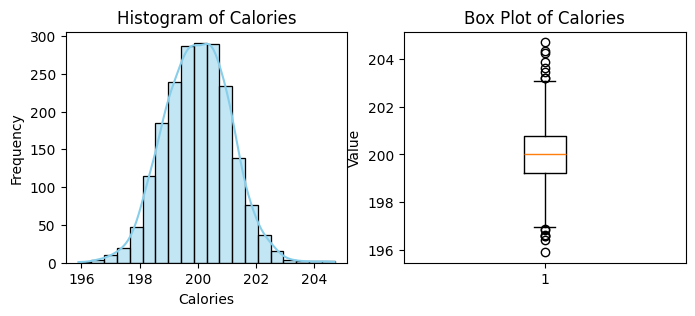

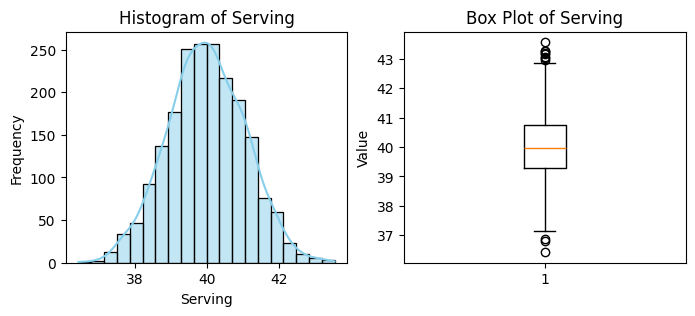

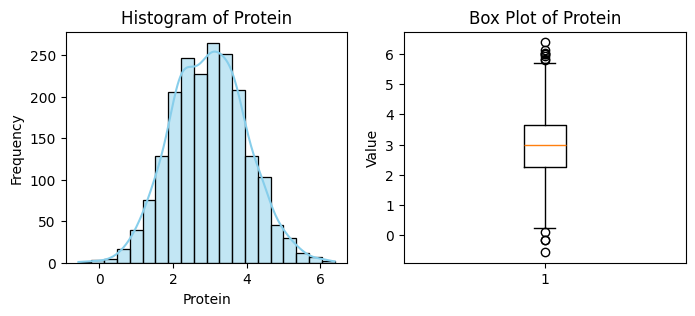

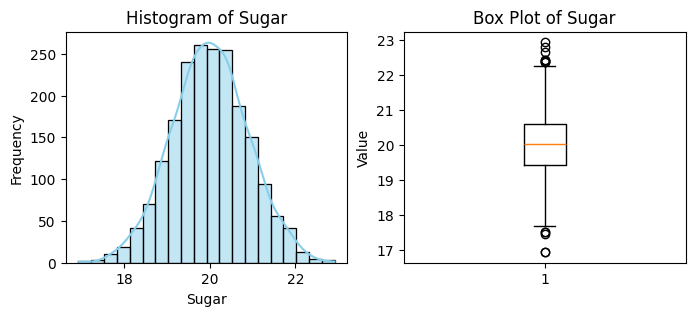

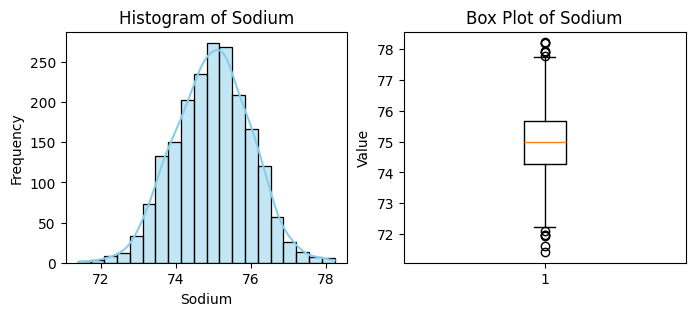

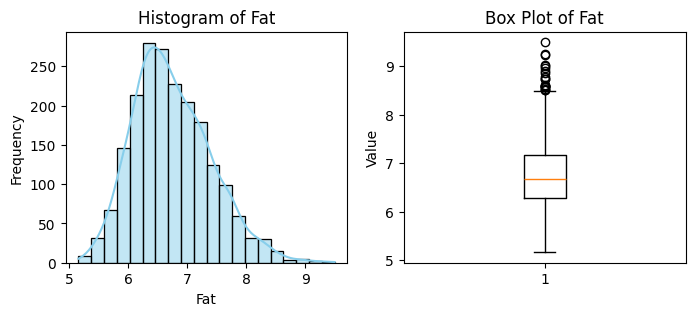

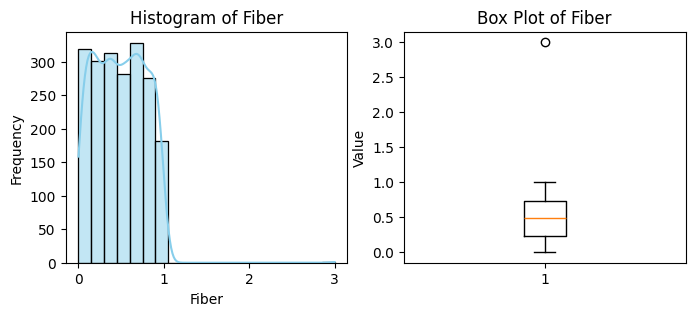

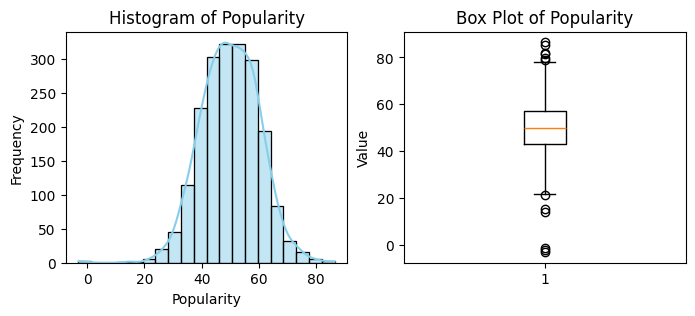

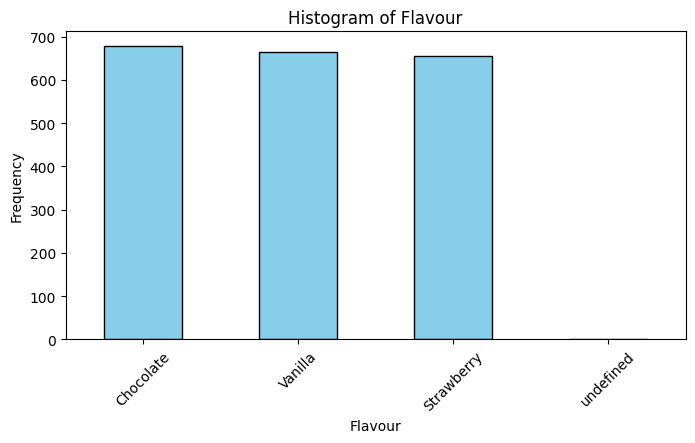

In [43]:
# Numeric data plot
for column in numeric_data.columns:
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    sns.histplot(numeric_data[column], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    
    axes[1].boxplot(numeric_data[column])
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_ylabel('Value')
    
    plt.show()

# String data plot
for column in string_data.columns:
    plt.figure(figsize=(8, 4))
    string_data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


<hr>

<b>4. Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?</b>

Identifikasi hasil visualisasi histogram dapat menggunakan definisi berikut:

* <b>Distribusi Normal (Gaussian)</b>: Histogram memiliki bentuk lonceng (bell-shaped) dengan puncaknya di tengah dan simetris di sekitarnya. Distribusi normal memiliki nilai rata-rata (mean) dan standar deviasi yang dapat digunakan untuk mendeskripsikan sebaran data.

* <b>Distribusi Skewed (Condong)</b>: Histogram memiliki ekor yang lebih panjang ke satu sisi daripada yang lain, sehingga tidak simetris. Distribusi skewness dapat berupa positive skew (ekor ke kanan) atau negative skew (ekor ke kiri).

* <b>Distribusi Bimodal (Dua Puncak)</b>: Histogram memiliki dua puncak yang jelas, menunjukkan bahwa data memiliki dua kelompok utama.

* <b>Distribusi Uniform (Seragam)</b>: Histogram memiliki distribusi yang merata, tanpa ada kelompok atau puncak yang jelas.

Analisis:
<ol>
<li>Visualisasi kolom <b>Calories, Serving, dan Sugar</b> memenuhi <b>Gaussian</b>. Sehingga kolom-kolom tersebut disebut <b>terdistribusi normal</b>.</li>
<li>Visualisasi kolom <b>Fat</b> adalah <b>Positive Skewed</b></li>
<li>Visualisasi kolom <b>Popularity, Sodium, Fiber, dan Flavor</b> adalah <b>Negative Skewed</b></li>
</ol>

<hr>

Andi baru saja mendapatkan pekerjaan di sebuah perusahaan permen. Di hari pertama kerja, Ia diminta untuk mengamati permen-permen yang dihasilkan pada pabrik. Selain itu, ia juga diberikan dataset yang berisi informasi mengenai permen-permen yang baru diproduksi. Lalu, ia diminta untuk melakukan analisis statistika terhadap permen-permen tersebut serta melakukan berbagai pengujian terhadap berbagai hipotesis. Bantulah Andi dalam melakukan hal-hal tersebut!

Atribut: Calories, Serving, Protein, Sugar, Sodium, Fat, Fiber, Flavour, Popularity

Gunakan alpha = 0.05

<b>5. Hipotesis 1 sampel</b>

* Perusahaan menerima beberapa keluhan bahwa permennya kurang manis. Periksalah anda mengecek apakah rata-rata nilai Sugar di bawah 25?
* Pada umumnya, rata-rata Serving untuk permen adalah 40 gram. Oleh karena itu, periksalah apakah rata-rata Serving permen yang diproduksi tidak bernilai 40 gram!
* Periksalah apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74!
* Periksalah apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset!


In [44]:
# 5 Tanpa Hipotesis
alpha = 0.05

# Perusahaan menerima beberapa keluhan bahwa permennya kurang manis. Periksalah anda mengecek apakah rata-rata nilai Sugar di bawah 25?
avg_sugar = data['Sugar'].mean()
assert avg_sugar < 25, "Rata-rata Sugar tidak kurang dari 25"
print("Rata-rata Sugar kurang dari 25, yaitu", avg_sugar)

# Pada umumnya, rata-rata Serving untuk permen adalah 40 gram. Oleh karena itu, periksalah apakah rata-rata Serving permen yang diproduksi tidak bernilai 40 gram!
avg_serving = data['Serving'].mean()
assert avg_serving != 40, "Rata-rata Serving tidak sama dengan 40"
print("Rata-rata Serving tidak sama dengan 40, yaitu", avg_serving)

# Periksalah apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74!
avg_last_20_sodium = data['Sodium'].tail(20).mean()
assert avg_last_20_sodium != 74, "Rata-rata Sodium tidak sama dengan 74"
print("Rata-rata Sodium tidak sama dengan 74, yaitu", avg_last_20_sodium)

# Periksalah apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset!
proporsi_protein_lebih_besar_3 = data['Protein'][data['Protein'] > 3].count() / len(data)
assert proporsi_protein_lebih_besar_3 != 0.6, "Proporsi Protein tidak sama dengan 60%"
print("Proporsi Protein tidak sama dengan 60%, yaitu", proporsi_protein_lebih_besar_3*100, "%")


Rata-rata Sugar kurang dari 25, yaitu 20.00408047512155
Rata-rata Serving tidak sama dengan 40, yaitu 39.98913901365223
Rata-rata Sodium tidak sama dengan 74, yaitu 74.52736407351043
Proporsi Protein tidak sama dengan 60%, yaitu 49.25 %


In [66]:
# 5 Dengan Hipotesis
alpha = 0.05
jumlahSample = len(data)
critical_value = normal_distribution(alpha) # Z value for alpha = 0.05
critical_value_2 = normal_distribution(alpha/2) # Z value for alpha/2 = 0.025


# TODO: CHECK THIS PART
# Perusahaan menerima beberapa keluhan bahwa permennya kurang manis. Periksalah anda mengecek apakah rata-rata nilai Sugar di bawah 25?
# H0: avg_sugar = 25
# H1 = avg_sugar < 25
# alpha = 0.05
# Critical region dengan z-test: z < -z(0.05)
# Komputasi
z = (data['Sugar'].mean() - 25) / (data['Sugar'].std() / np.sqrt(jumlahSample))
P_Value = z_test_p_value(z)
# Jika z < -z(0.05), maka H0 ditolak dan berarti rata-rata Sugar kurang dari 25
print("Uji Statistik:", "Rata-rata Sugar kurang dari 25" if z < -critical_value else "Rata-rata tidak Sugar kurang dari 25")
# Jika P-Value < alpha, maka H0 ditolak dan berarti rata-rata Sugar kurang dari 25
print("Uji Signifikan:", "Rata-rata Sugar kurang dari 25" if P_Value < alpha else "Rata-rata tidak Sugar kurang dari 25")
print()


# Pada umumnya, rata-rata Serving untuk permen adalah 40 gram. Oleh karena itu, periksalah apakah rata-rata Serving permen yang diproduksi tidak bernilai 40 gram!
# H0: avg_serving = 40
# H1 = avg_serving != 40
# alpha = 0.05
# Critical region dengan z-test: z < -z(0.025) atau z > z(0.025)
# Komputasi
z = (avg_serving - 40) / (data['Serving'].std() / np.sqrt(jumlahSample))
P_Value = z_test_p_value(z)
# Jika z < -z(0.025) atau z > z(0.025), maka H0 ditolak dan berarti rata-rata Serving tidak sama dengan 40
print("Uji Statistik:", "Rata-rata Serving tidak sama dengan 40" if z < -critical_value_2 or z > critical_value_2 else "Rata-rata Serving sama dengan 40")
# Jika P-Value < alpha, maka H0 ditolak dan berarti rata-rata Serving tidak sama dengan 40
print("Uji Signifikan:", "Rata-rata Serving tidak sama dengan 40" if P_Value < alpha else "Rata-rata Serving sama dengan 40")
print()


# Periksalah apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74!
# H0: avg_sodium = 74
# H1 = avg_sodium != 74
# alpha = 0.05
# Critical region dengan z-test: z < -z(0.025) atau z > z(0.025)
# Komputasi
last_20_sodium = data['Sodium'].tail(20)
z = (last_20_sodium.mean() - 74) / (last_20_sodium.std() / np.sqrt(20))
P_Value = z_test_p_value(z)
# Jika z < -z(0.025) atau z > z(0.025), maka H0 ditolak dan berarti rata-rata Sodium tidak sama dengan 74
print("Uji Statistik:", "Rata-rata 20 Sodium terakhir tidak sama dengan 74" if z < -critical_value_2 or z > critical_value_2 else "Rata-rata 20 Sodium terakhir sama dengan 74")
# Jika P-Value < alpha, maka H0 ditolak dan berarti rata-rata Sodium tidak sama dengan 74
print("Uji Signifikan:", "Rata-rata 20 Sodium terakhir tidak sama dengan 74" if P_Value < alpha else "Rata-rata 20 Sodium terakhir sama dengan 74")
print()


# Periksalah apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset!
# H0: proporsi_protein = 0.6 * jumlahSample
# H1 = proporsi_protein != 0.6 * jumlahSample
# alpha = 0.05
# Critical region: z < -z(0.025) atau z > z(0.025)
# Komputasi
protein_lebih_besar_3 = data['Protein'][data['Protein'] > 3]
x = protein_lebih_besar_3.count()
p0 = 0.6
temp_avg = jumlahSample * p0 # rata-rata 
temp_var = jumlahSample * p0 * (1 - p0) # variansi
z = (x - temp_avg) / np.sqrt(temp_var)
P_Value = z_test_p_value(z)
# Jika z < -z(0.025) atau z > z(0.025), maka H0 ditolak dan berarti proporsi Protein tidak sama dengan 60%
print("Uji Statistik:", "Proporsi Protein yang lebih dari 3 tidak sama dengan 60%" if z < -critical_value_2 or z > critical_value_2 else "Proporsi Protein yang lebih dari 3 sama dengan 60%")
# Jika P-Value < alpha, maka H0 ditolak dan berarti proporsi Protein tidak sama dengan 60%
print("Uji Signifikan:", "Proporsi Protein yang lebih dari 3 tidak sama dengan 60%" if P_Value < alpha else "Proporsi Protein yang lebih dari 3 sama dengan 60%")

Uji Statistik: Rata-rata Sugar kurang dari 25
Uji Signifikan: Rata-rata tidak Sugar kurang dari 25

Uji Statistik: Rata-rata Serving sama dengan 40
Uji Signifikan: Rata-rata Serving sama dengan 40

Uji Statistik: Rata-rata 20 Sodium terakhir tidak sama dengan 74
Uji Signifikan: Rata-rata 20 Sodium terakhir tidak sama dengan 74

Uji Statistik: Proporsi Protein yang lebih dari 3 tidak sama dengan 60%
Uji Signifikan: Proporsi Protein yang lebih dari 3 sama dengan 60%
-9.813362488634226 1.0


<hr>

6. Hipotesis 2 sampel
Perusahaan ingin membandingkan kualitas permen yang diproduksi pada paruh awal dan paruh akhir produksi. Hal ini dapat dilakukan dengan membagi 1 dataset menjadi 2 bagian yang sama panjang. 

* Periksalah apakah rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu!
* Bandingkan rata-rata Protein dari permen pada paruh awal dan akhir. Apakah rata-rata Protein pada dataset bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit?
* Periksalah apakah variansi dari Sodium dari permen sama pada paruh awal dan akhir!
* Periksalah apakah proporsi Calories dari permen yang lebih dari 200 pada paruh awal lebih besar daripada proporsi di paruh akhir!


In [47]:
# 6 Tanpa Hipotesis

# Bagi dataset menjadi dua bagian yang sama besar, yaitu awal produksi dan akhir produksi!
dataset1 = data.iloc[:len(data)//2] # 0 sampai setengah
dataset2 = data.iloc[len(data)//2:] # setengah sampai akhir

# Periksalah apakah jumlah data pada awal produksi dan akhir produksi sama!
assert len(dataset1) == len(dataset2), "Jumlah data tidak sama"



# Periksalah apakah rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu!
print("Rata-rata Sugar pada awal produksi:", dataset1['Sugar'].mean())
print("Rata-rata Sugar pada akhir produksi:", dataset2['Sugar'].mean())
print("Rata-rata Sugar pada awal produksi sama dengan akhir produksi" if dataset1['Sugar'].mean() == dataset2['Sugar'].mean() else "Rata-rata Sugar pada awal produksi tidak sama dengan akhir produksi")
print()

# Bandingkan rata-rata Protein dari permen pada paruh awal dan akhir. Apakah rata-rata Protein pada dataset bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit?
print("Rata-rata Protein pada awal produksi:", dataset1['Protein'].mean())
print("Rata-rata Protein pada akhir produksi:", dataset2['Protein'].mean())
print("Rata-rata Protein pada awal produksi lebih besar dari akhir produksi sebesar 0.3 unit" if dataset1['Protein'].mean() > dataset2['Protein'].mean() + 0.3 else "Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit")
print()

# Periksalah apakah variansi dari Sodium dari permen sama pada paruh awal dan akhir!
print("Variansi Sodium pada awal produksi:", dataset1['Sodium'].var())
print("Variansi Sodium pada akhir produksi:", dataset2['Sodium'].var())
print("Variansi Sodium pada awal produksi sama dengan akhir produksi" if dataset1['Sodium'].var() == dataset2['Sodium'].var() else "Variansi Sodium pada awal produksi tidak sama dengan akhir produksi")
print()

# Periksalah apakah proporsi Calories dari permen yang lebih dari 200 pada paruh awal lebih besar daripada proporsi di paruh akhir!
print("Proporsi Calories > 200 pada awal produksi:", dataset1['Calories'][dataset1['Calories'] > 200].count() / len(dataset1))
print("Proporsi Calories > 200 pada akhir produksi:", dataset2['Calories'][dataset2['Calories'] > 200].count() / len(dataset2))
print("Proporsi Calories > 200 pada awal produksi lebih besar dari akhir produksi" if dataset1['Calories'][dataset1['Calories'] > 200].count() / len(dataset1) > dataset2['Calories'][dataset2['Calories'] > 200].count() / len(dataset2) else "Proporsi Calories > 200 pada awal produksi tidak lebih besar dari akhir produksi")



Rata-rata Sugar pada awal produksi: 19.97790788011704
Rata-rata Sugar pada akhir produksi: 20.03025307012606
Rata-rata Sugar pada awal produksi tidak sama dengan akhir produksi

Rata-rata Protein pada awal produksi: 2.9857963570785406
Rata-rata Protein pada akhir produksi: 2.9630345465416705
Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit

Variansi Sodium pada awal produksi: 1.043096058792251
Variansi Sodium pada akhir produksi: 0.9876979590534466
Variansi Sodium pada awal produksi tidak sama dengan akhir produksi

Proporsi Calories > 200 pada awal produksi: 0.521
Proporsi Calories > 200 pada akhir produksi: 0.48
Proporsi Calories > 200 pada awal produksi lebih besar dari akhir produksi


In [67]:
# 6 Dengan Hipotesis

# Keterangan Variabel:
# x0 = rata-rata dataset1
# x1 = rata-rata dataset2
# p0 = proporsi dataset1
# p1 = proporsi dataset2
# p = proporsi gabungan
# d0 = nilai yang diinginkan
# d = selisih rata-rata
# sp = standar deviasi sampel
# t = nilai statistik uji
# t_critical = nilai kritis uji
# f = nilai statistik uji
# f_critical = nilai kritis uji


# Bagi dataset menjadi dua bagian yang sama besar, yaitu dataset1 dan dataset2!
dataset1 = data.iloc[:len(data)//2] # 0 sampai setengah
dataset2 = data.iloc[len(data)//2:] # setengah sampai akhir

# Periksalah apakah jumlah data pada dataset1 dan dataset2 sama!
assert len(dataset1) == len(dataset2), "Jumlah data tidak sama"

alpha = 0.05
jumlahSample1 = jumlahSample2 = len(data)//2


# Periksalah apakah rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu!
# H0: avg_sugar1 = avg_sugar2 atau avg_sugar1 - avg_sugar2 = 0
# H1 = avg_sugar1 != avg_sugar2 atau avg_sugar1 - avg_sugar2 != 0
# alpha = 0.05
# Uji statistik t test dengan critical range t < -t(0.025, df) atau t > t(0.025, df)
# Komputasi
df = jumlahSample1 + jumlahSample2 - 2
x0 = dataset1['Sugar'].mean()
x1 = dataset2['Sugar'].mean()
d0 = 0
d = x0 - x1
sp = np.sqrt(((jumlahSample1-1)*dataset1['Sugar'].var() + (jumlahSample2-1)*dataset2['Sugar'].var()) / (jumlahSample1 + jumlahSample2 - 2))
t = (d - d0) / (sp * np.sqrt(1/jumlahSample1 + 1/jumlahSample2))
t_critical = t_test_critical_value(df, alpha/2)
P_Value = t_test_p_value(t, df)
# Jika t < -t(0.025, df) atau t > t(0.025, df), maka H0 ditolak dan berarti rata-rata Sugar tidak sama
print("Uji Statistik:", "Rata-rata Sugar pada awal produksi tidak sama dengan akhir produksi" if t < -t_critical or t > t_critical else "Rata-rata Sugar pada awal produksi sama dengan akhir produksi")
# Jika P-value < alpha, maka H0 ditolak
print("Uji Signifikan", "Rata-rata Sugar pada awal produksi tidak sama dengan akhir produksi" if P_Value < alpha else "Rata-rata Sugar pada awal produksi sama dengan akhir produksi")


# Bandingkan rata-rata Protein dari permen pada paruh awal dan akhir. Apakah rata-rata Protein pada dataset bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit?
# H0: avg_protein1 - avg_protein2 = 0
# H1 = avg_protein1 - avg_protein2 > 0.3
# alpha = 0.05
# Uji statistik t test dengan critical range t > t(0.05, df)
# Komputasi
df = jumlahSample1 + jumlahSample2 - 2
x0 = dataset1['Protein'].mean()
x1 = dataset2['Protein'].mean()
d0 = 0.3
d = x0 - x1
sp = np.sqrt(((jumlahSample1-1)*dataset1['Protein'].var() + (jumlahSample2-1)*dataset2['Protein'].var()) / (jumlahSample1 + jumlahSample2 - 2))
t = (d - d0) / (sp * np.sqrt(1/jumlahSample1 + 1/jumlahSample2))
t_critical = t_test_critical_value(df, alpha)
P_Value = t_test_p_value(t, df)
# Jika t > t(0.05, df), maka H0 ditolak dan berarti rata-rata Protein pada dataset1 lebih besar dari dataset2 sebesar 0.3 unit
print("Uji Statistik:", "Rata-rata Protein pada awal produksi lebih besar dari akhir produksi sebesar 0.3 unit" if t > t_critical else "Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit")
# Jika P-value < alpha, maka H0 ditolak
print("Uji Signifikan", "Rata-rata Protein pada awal produksi lebih besar dari akhir produksi sebesar 0.3 unit" if P_Value < alpha else "Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit")


# Periksalah apakah variansi dari Sodium dari permen sama pada paruh awal dan akhir!
# H0: var_sodium1 = var_sodium2
# H1 = var_sodium1 != var_sodium2
# alpha = 0.05
# Uji statistik f test dengan critical range f < f(0.05, df1, df2) atau f > f(0.95, df1, df2)
# Komputasi
df1 = jumlahSample1 - 1
df2 = jumlahSample2 - 1
var_sodium1 = dataset1['Sodium'].var()
var_sodium2 = dataset2['Sodium'].var()
f = var_sodium1 / var_sodium2
f_critical = f_test_critical_value(alpha, df1, df2) # [0] -> lower, [1] -> upper
P_Value = f_test_p_value(f, df1, df2)
# Jika f < f(0.95, df1, df2) atau f > f(0.05, df1, df2), maka H0 ditolak dan berarti variansi Sodium tidak sama
print("Uji Statistik:", "Variansi Sodium pada awal produksi tidak sama dengan akhir produksi" if f < f_critical[0] or f > f_critical[1] else "Variansi Sodium pada awal produksi sama dengan akhir produksi")
# Jika P-value < alpha, maka H0 ditolak
print("Uji Signifikan", "Variansi Sodium pada awal produksi tidak sama dengan akhir produksi" if P_Value < alpha else "Variansi Sodium pada awal produksi sama dengan akhir produksi")


# Periksalah apakah proporsi Calories dari permen yang lebih dari 200 pada paruh awal lebih besar daripada proporsi di paruh akhir!
# H0: proporsi_calories1 = proporsi_calories2
# H1 = proporsi_calories1 > proporsi_calories2
# alpha = 0.05
# Uji statistik z test dengan critical range z > z(0.05)
# Komputasi
df = jumlahSample1 + jumlahSample2 - 2
p0 = dataset1['Calories'][dataset1['Calories'] > 200].count() / len(dataset1)
p1 = dataset2['Calories'][dataset2['Calories'] > 200].count() / len(dataset2)
p = (dataset1['Calories'][dataset1['Calories'] > 200].count() + dataset2['Calories'][dataset2['Calories'] > 200].count()) / (len(dataset1) + len(dataset2))
z = (p0 - p1) / np.sqrt(p * (1 - p) * (1/jumlahSample1 + 1/jumlahSample2))
z_critical = normal_distribution(alpha)
# Jika z > z(0.05), maka H0 ditolak dan berarti proporsi Calories pada dataset1 lebih besar dari dataset2
print("Uji Statistik:", "Proporsi Calories > 200 pada awal produksi lebih besar dari akhir produksi" if z > z_critical else "Proporsi Calories > 200 pada awal produksi tidak lebih besar dari akhir produksi")
# Jika P-value < alpha, maka H0 ditolak
print("Uji Signifikan", "Proporsi Calories > 200 pada awal produksi lebih besar dari akhir produksi" if P_Value < alpha else "Proporsi Calories > 200 pada awal produksi tidak lebih besar dari akhir produksi")

Rata-rata Sugar pada awal produksi sama dengan akhir produksi
Rata-rata Sugar pada awal produksi sama dengan akhir produksi
Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit
Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit
Variansi Sodium pada awal produksi sama dengan akhir produksi
Variansi Sodium pada awal produksi sama dengan akhir produksi
Proporsi Calories > 200 pada awal produksi lebih besar dari akhir produksi
Proporsi Calories > 200 pada awal produksi tidak lebih besar dari akhir produksi
